In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
%pwd

'D:\\IronHack\\IronHack_Classes\\Week_Lab_8\\lab-problems-with-ML\\your-code'

In [16]:
df = pd.read_csv(r'D:\IronHack\IronHack_Classes\Test_codes\Position_Salaries.csv')

In [17]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
y = df['Salary']

In [20]:
X = df.drop(columns='Salary')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
regressor = RandomForestRegressor(n_estimators = 10, random_state=0)

In [32]:
regressor.fit(X, y)

ValueError: could not convert string to float: 'Business Analyst'

In [33]:
%matplotlib inline

In [34]:
X = np.random.rand(1000,10)

In [35]:
time = np.random.randint(2000,2011, size=1000)

In [36]:
X = np.hstack((X,time.reshape(-1,1)))

In [39]:
weights = np.random.rand(11)

In [40]:
y = X.dot(weights)

In [41]:
# create test data that include years
# not in training data 2000 - 2019

In [42]:
X_test = np.random.rand(1000,10)
time_test = np.random.randint(2000,2020,size=1000)
X_test = np.hstack((X_test,time_test.reshape(-1,1)))
y_test = X_test.dot(weights)

In [43]:
#fit & score the data using RF
RF = RandomForestRegressor(n_estimators=100)
RF.fit(X,y)
RF.score(X_test, y_test)

0.5254659516370928

In [44]:
#plot RF as trees increase
#set starting point for subplots
index = 1

In [53]:
plt.figure(figsize=(20,10))

#iterate through number of trees in model

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [54]:
for i in [1,5,10,100]:
    plt.subplot(2,2, index)
    RF_plot = RandomForestRegressor(n_estimators=i)
    RF_plot.fit(X,y)
    #split data btw vals RF 
    interpolate_index = X_test[:,10] <=2010
    extrapolate_index = X_test[:,10]>2010
    X_interpolate = X_test[interpolate_index]
    X_extrapolate = X_test[extrapolate_index]
    y_interpolate = y_test[interpolate_index]
    y_extrapolate = y_test[extrapolate_index]
    #plot predictions vs. actual
    plt.scatter(RF_plot.predict(X_interpolate),
               y_interpolate,
                color='g', label='interpolate')
    plt.scatter(RF_plot.predict(X_extrapolate),
               y_extrapolate,
               color='b', label='extrapolate')
    plt.xlabel("Predicated")
    plt.ylabel('Actual')
    plt.title('Random forest with {} trees'.format(i))
    plt.subplots_adjust(wspace=.4, hspace=.4)
    plt.legend(loc='best')
    index +=1

ValueError: num must be 1 <= num <= 4, not 5

<Figure size 432x288 with 0 Axes>

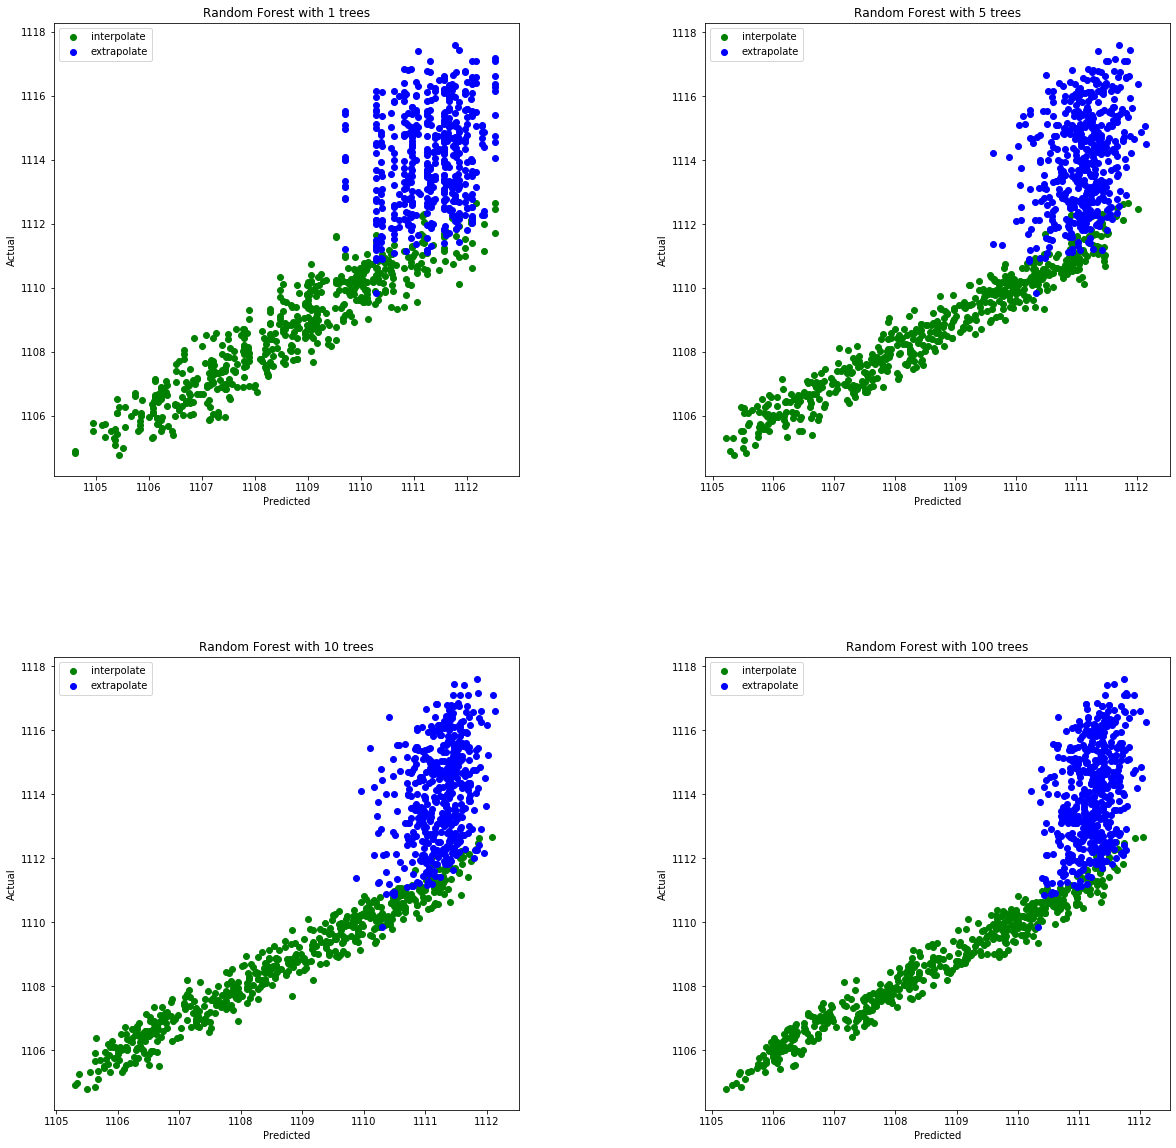

In [56]:
#plot RF as trees increase
#set starting point for subplots
index = 1
#set the size of the subplot to something large
plt.figure(figsize=(20,20))
#iterate through number of trees in model
#and plot predictions v actual
for i in [1,5,10,100]:
    plt.subplot(2, 2, index)
    RF_plot = RandomForestRegressor(n_estimators=i)
    RF_plot.fit(X,y)
    #split data btw vals RF can interploate vs. data
    #it needs to exptrapolate
    interpolate_index = X_test[:,10]<=2010
    extrapolate_index = X_test[:,10]>2010
    X_interpolate = X_test[interpolate_index]
    X_extrapolate = X_test[extrapolate_index]
    y_interpolate = y_test[interpolate_index]
    y_extrapolate = y_test[extrapolate_index]
    #plot predictions vs. actual
    plt.scatter(RF_plot.predict(X_interpolate),
                y_interpolate,
                color="g",label="interpolate")
    plt.scatter(RF_plot.predict(X_extrapolate),
                y_extrapolate,
                color="b",label="extrapolate")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Random Forest with {} trees'.format(i))
    plt.subplots_adjust(wspace=.4, hspace=.4)
    plt.legend(loc="best")
    index += 1

In [60]:
def rfr_model(X,y):
    # Perform Grid-Search
    gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
        param_grid={
            'max_depth' : range(3,7),
            'n_estimators' : (10,50,100,1000),            
        },
        cv=5, scoring='neg_mean_sq_error', verbose=0, n_jobs=-1)
    grid_result = gsc.fit(X,y)
    best_params = grid_result.best_params
    
    rfr = RandomForestRegressor(max_depth=best_params['max_depth'],
                               n_estimators=best_params['n_estimators'],
                               random_state=False, verbose=False)
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X,y,cv=10,
                            socring = 'neg_mean_absolute_error')
    return scores

In [62]:
scores = cross_val_score(rfr, X, y, cv=10, 
scoring='neg_mean_absolute_error')

NameError: name 'cross_val_score' is not defined